<a href="https://colab.research.google.com/github/DhananjayGorain/IOT-Devices---Data-Analysis/blob/main/IOT_Devices_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IoT Devices - Time Series Plots**\:

Context
IoT devices have been around for quite a while now. They are used to collect data through different kinds of sensors such as Motion sensors: These use a visual sensor to detect a change in apparent temperature of surroundings or when someone comes in the field of view of a camera. Heat sensors: These are used in trucks which carry perishable goods like fish and milk where changes in a temperature lower the shelf life of the produce. These are also used to detect forest fires.

Vibration sensors: These are used in car crash tests and detecting if someone is trying to cut a tree.

A lot of people are using smartwatches and fitness watches to track their daily physical activities, calories burnt, average resting heart rates, sleep cycle so that they lead a fit life. Such wearables are equipped with laser sensors to collect data.

Heat Index (temperature + humidity ) is one common data recorded on these IoT readers. The frequency of the upcoming data is very fast. The sensor reads hundreds to millions of data per second. There is a huge and versatile application of this data in real-world like agriculture, weather forecasting, soil monitoring and treatment, enterprise maintenance etc.

Heat stress index of India.
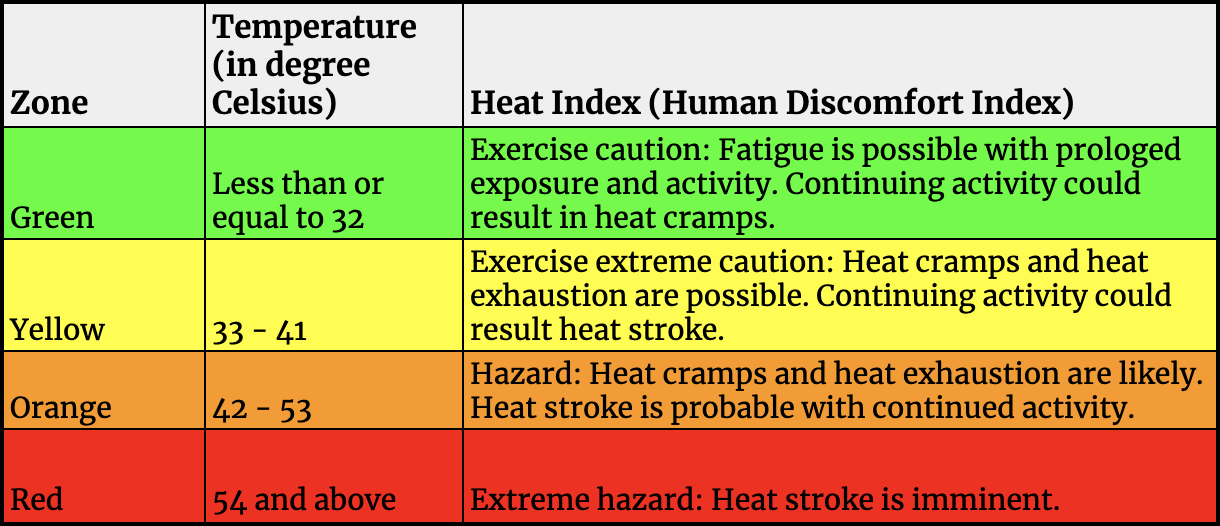

# **Problem Statement**

Put yourself in the shoes of a quality analyst whose task is to test the efficacy of new IoT devices. You need to create time-series plots for daily temperature variation for the given duration and find any inconsistencies in the temperature readings (if there are any).

In case the data collected through the device is correct, find the percentages of the yellow, orange and red zones.

# **Data Description**

This dataset contains the temperature readings from an IoT device installed outside and inside of an anonymous room (labelled as admin room) to test the device. The readings were taken between 11 January 2018 and 10 December 2018. Additionally, it was uninstalled or taken down quite frequently during the entire reading period. There are 5 columns and 97,605 rows in the dataset.

**id** - unique IDs for each reading

**room_id/id ** - room id in which device was installed (inside and/or outside). In this dataset, only Room Admin label is used as a room_id for example purpose.

**noted_date** - date and time of reading

**temp** - temperature readings

**out/in** - whether the reading was taken from a device installed inside or outside of the room?

Here's the dataset link:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/iot-devices/IoT-device.csv

# **1. Import Modules & Load Dataset**

In [ ]:
# Import the required modules and load the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/iot-devices/IoT-device.csv')
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [ ]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


# **2. Missing Values Check**

Check for the null values in the DataFrame.

In [ ]:
# Check for the null values in the DataFrame.
df.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

# **3. Drop Unnecessary Columns**

Find out if there are unnecessary columns in the DataFrame. If there are any, then drop them from the DataFrame.

In [ ]:
# Find out if there are unnecessary columns in the DataFrame. If there are any, then drop them from the DataFrame. 
df.dropna()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


# **4. Get datetime Objects**

Convert the values contained in the noted_date column into the datetime objects.

In [ ]:
# Convert the values contained in the 'noted_date' column into the 'datetime' objects.
df['noted_date'] = pd.to_datetime(df['noted_date'])

In [ ]:
# Verify whether the conversion is successful or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          97606 non-null  object        
 1   room_id/id  97606 non-null  object        
 2   noted_date  97606 non-null  datetime64[ns]
 3   temp        97606 non-null  int64         
 4   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.7+ MB


# **5. Sort The DataFrame**

Sort the DataFrame in the chronological order.

In [ ]:
# Sort the DataFrame in the increasing order of dates and time.
df=df.sort_values(by='noted_date')

# **6. Add More Features**

Get the year, month, day, day name, hours and minutes values from the datetime values and create new columns for the same.

In [ ]:
# Create new columns for year, month, day, day name, hours and minutes values and add to the DataFrame.
df['Year'] = df['noted_date'].dt.year
df['Month'] = df['noted_date'].dt.month
df['Day'] = df['noted_date'].dt.day
df['Day_name'] = df['noted_date'].dt.day_name()
df['Hour'] = df['noted_date'].dt.hour
df['Minutes'] = df['noted_date'].dt.minute

In [ ]:
# Display the first five rows of the DataFrame.
df.head()

,id,room_id/id,noted_date,temp,out/in,Year,Month,Day,Day_name,Hour,Minutes
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In,2018,1,11,Thursday,0,6
16217,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out,2018,1,11,Thursday,0,7
16216,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out,2018,1,11,Thursday,0,9
16215,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out,2018,1,11,Thursday,0,13
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out,2018,1,11,Thursday,0,23


# **7. Line Plots & Box Plots**

Create line plots and box plots for the temperature recorded in the indoor and outdoor settings.

In [ ]:
# Create a DataFrame for the indoor temperature records.
df_indoor=df[df["out/in"]=="In"]
df_indoor

,id,room_id/id,noted_date,temp,out/in,Year,Month,Day,Day_name,Hour,Minutes
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In,2018,1,11,Thursday,0,6
16186,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In,2018,1,11,Thursday,2,12
16176,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In,2018,1,11,Thursday,2,44
16174,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In,2018,1,11,Thursday,2,46
16167,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In,2018,1,11,Thursday,2,58
...,...,...,...,...,...,...,...,...,...,...,...
50723,__export__.temp_log_41083_917dc7ae,Room Admin,2018-12-10 20:25:00,35,In,2018,12,10,Monday,20,25
50721,__export__.temp_log_41090_c0ed0bd1,Room Admin,2018-12-10 20:35:00,34,In,2018,12,10,Monday,20,35
50720,__export__.temp_log_41091_8546ae99,Room Admin,2018-12-10 20:37:00,35,In,2018,12,10,Monday,20,37
50706,__export__.temp_log_41129_77d8da57,Room Admin,2018-12-10 21:31:00,34,In,2018,12,10,Monday,21,31


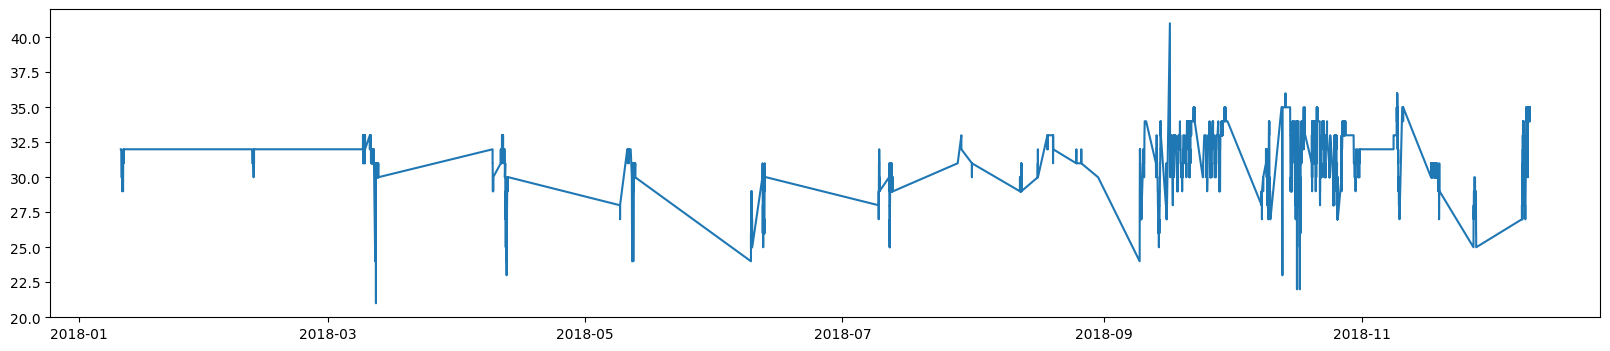

In [ ]:
# Create a time series line plot for the indoor temperature records.
plt.figure(figsize=(20,4))
plt.plot(df_indoor["noted_date"],df_indoor["temp"])
plt.show()

In [ ]:
# Create a DataFrame for the outdoor temperature records.
df_outdoor=df[df["out/in"]=="Out"]
df_outdoor

,id,room_id/id,noted_date,temp,out/in,Year,Month,Day,Day_name,Hour,Minutes
16217,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out,2018,1,11,Thursday,0,7
16216,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out,2018,1,11,Thursday,0,9
16215,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out,2018,1,11,Thursday,0,13
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out,2018,1,11,Thursday,0,23
16213,__export__.temp_log_127981_32c85db7,Room Admin,2018-01-11 00:25:00,40,Out,2018,1,11,Thursday,0,25
...,...,...,...,...,...,...,...,...,...,...,...
50668,__export__.temp_log_41241_36e995ef,Room Admin,2018-12-10 23:41:00,44,Out,2018,12,10,Monday,23,41
50667,__export__.temp_log_41244_1cef6363,Room Admin,2018-12-10 23:43:00,44,Out,2018,12,10,Monday,23,43
50666,__export__.temp_log_41249_7d6819cd,Room Admin,2018-12-10 23:49:00,44,Out,2018,12,10,Monday,23,49
50665,__export__.temp_log_41250_eed95540,Room Admin,2018-12-10 23:51:00,45,Out,2018,12,10,Monday,23,51


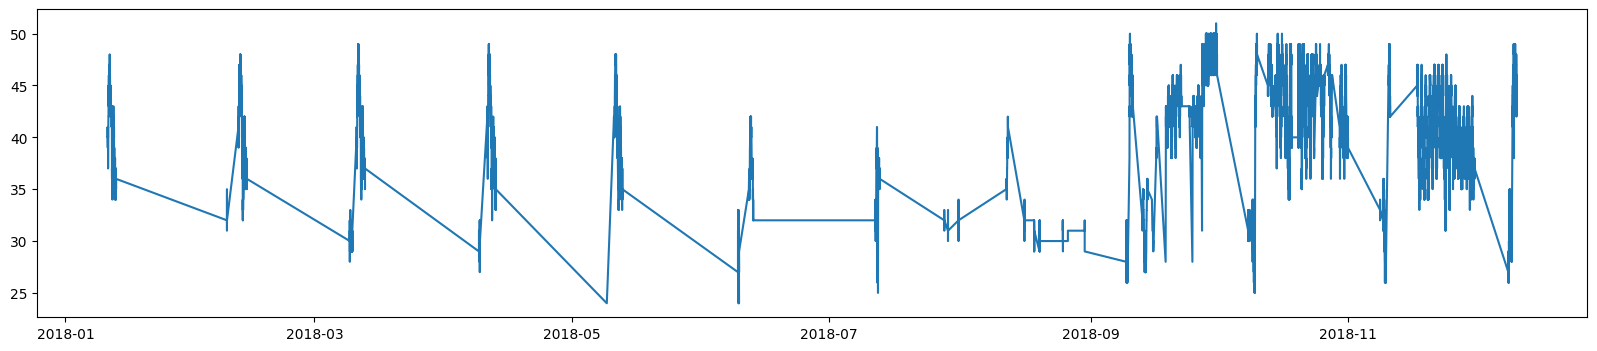

In [ ]:
# Create a time series line plot for the outdoor temperature records.
plt.figure(figsize=(20,4))
plt.plot(df_outdoor["noted_date"],df_outdoor["temp"])
plt.show()

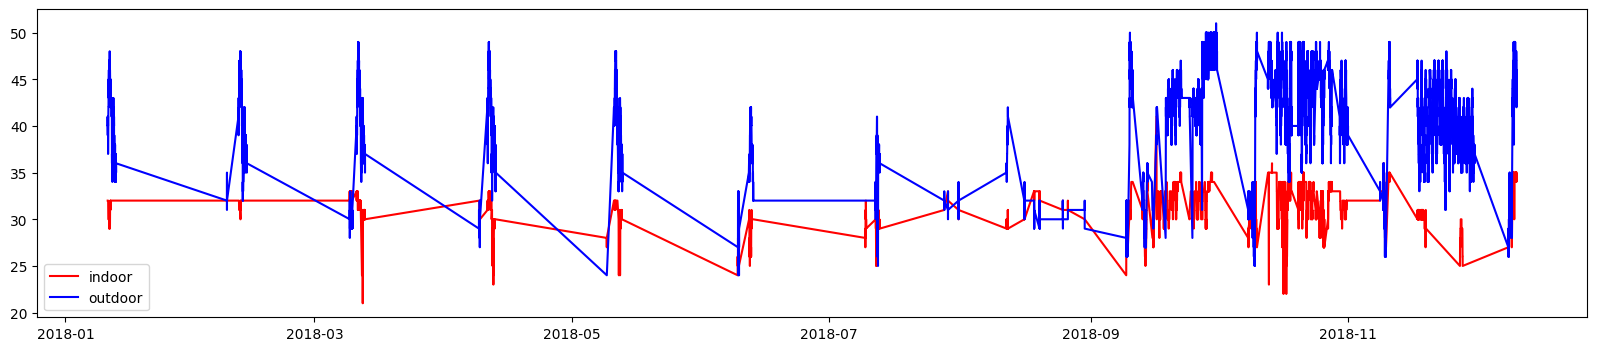

In [ ]:
# Compare the time series line plots for both the indoor and outdoor temperature records.
plt.figure(figsize=(20,4))
plt.plot(df_indoor["noted_date"],df_indoor["temp"],color="red",label="indoor")
plt.plot(df_outdoor["noted_date"],df_outdoor["temp"],color="blue",label="outdoor")
plt.legend()
plt.show()

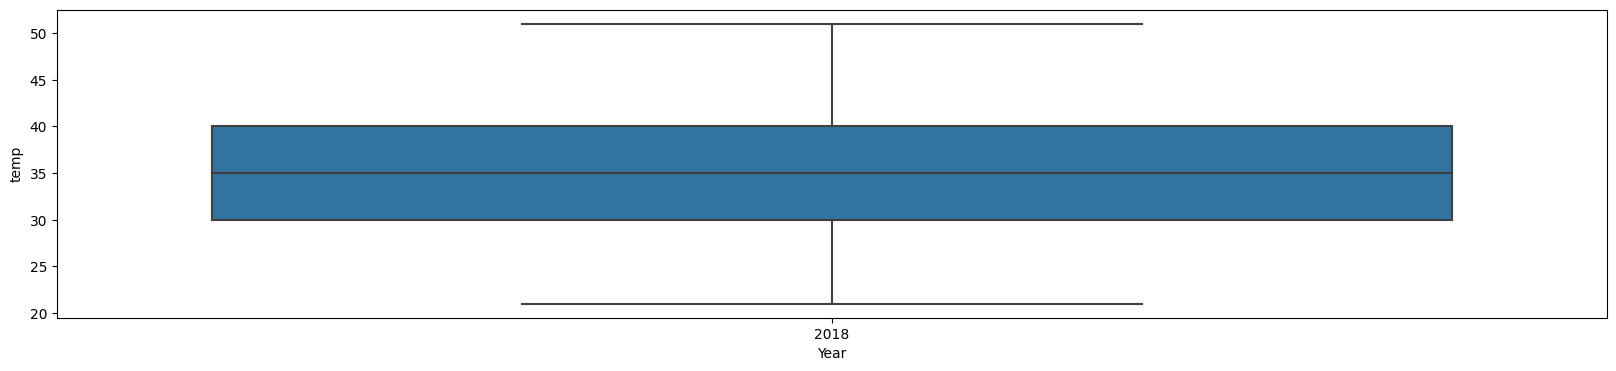

In [ ]:
# Create a box plot to represent the distribution of indoor and outdoor temperatures for the whole year.
plt.figure(figsize=(20,4))
sns.boxplot(x=df['Year'],y=df['temp'])
plt.show()

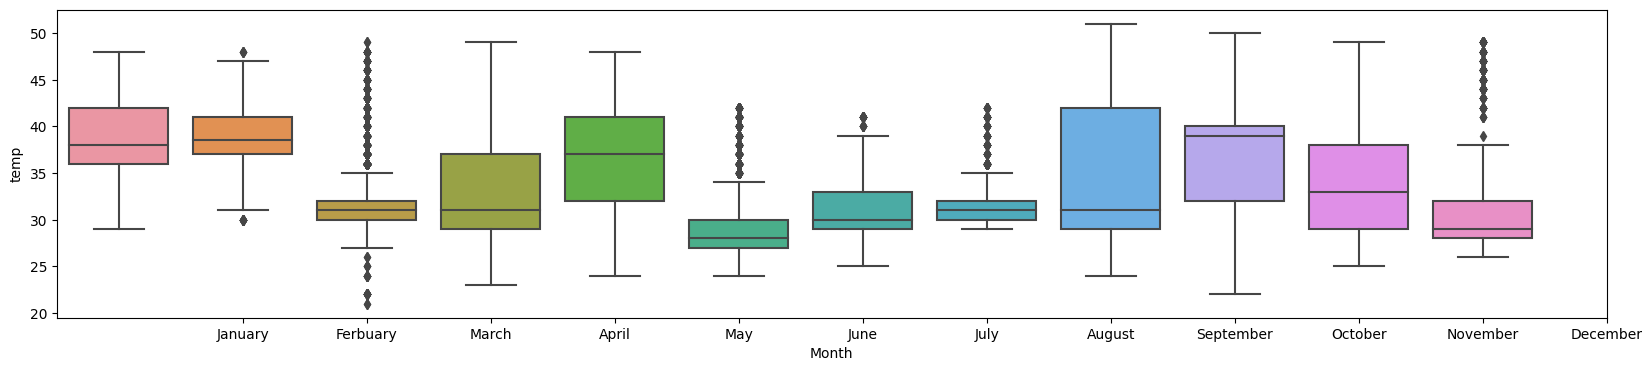

In [ ]:
# Create a box plot to represent the monthly distribution of indoor and outdoor temperatures. Also label the x-axis with actual month names.
months_list= ["January", "Ferbuary", "March","April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(20,4))
sns.boxplot(x="Month",y="temp",data=df)
plt.xticks(ticks=np.arange(1,13),labels=months_list)
plt.show()

# **8. Grouping, Aggregation & More Plots**

Group the data by the indoor and outdoor temperatures. Also, get monthly mean, standard deviation, median, minimum and maximum values for both the indoor and outdoor groups.

In [ ]:
# Group the data to get the monthly median indoor and outdoor temperatures along with the max and minimum temperatures.
group_monthly = df.groupby(by="Month")
group_monthly_in = df_indoor.groupby(by="Month")
group_monthly_out = df_outdoor.groupby(by="Month")
print(group_monthly_in.agg(func={'temp':['max', 'min']}))
print(group_monthly_out.agg(func={'temp':['max', 'min']}))

      temp    
       max min
Month         
1       32  29
2       32  30
3       33  21
4       33  23
5       32  24
6       31  24
7       33  25
8       33  29
9       41  24
10      36  22
11      36  25
12      35  27
      temp    
       max min
Month         
1       48  34
2       48  31
3       49  28
4       49  27
5       48  24
6       42  24
7       41  25
8       42  29
9       51  26
10      50  25
11      49  26
12      49  26


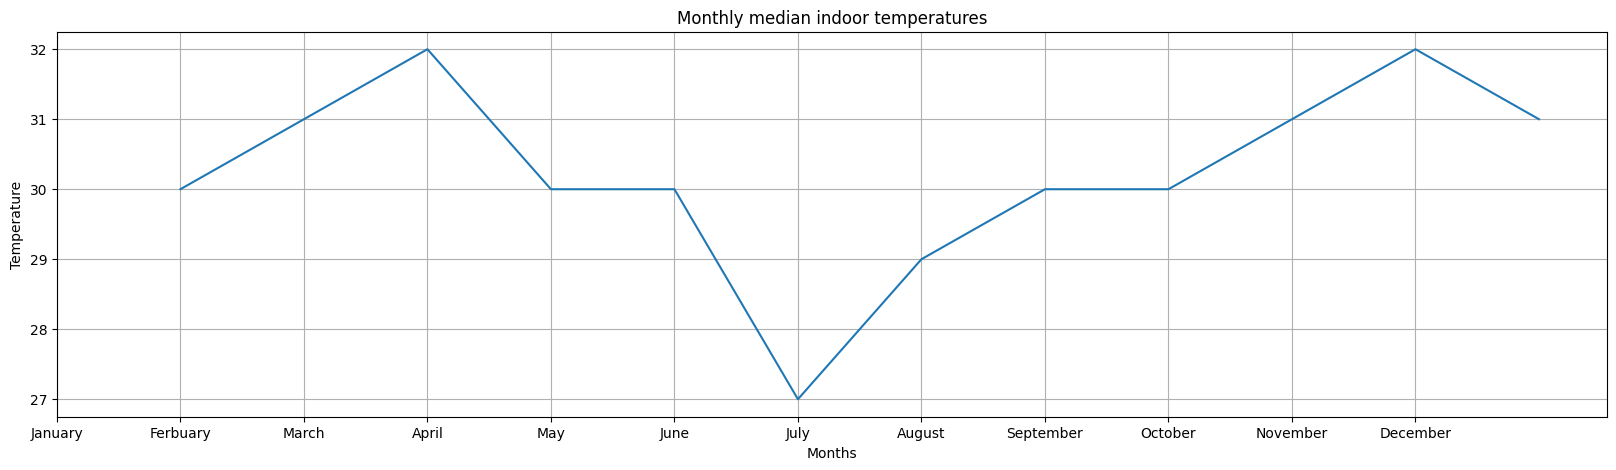

In [ ]:
# Create a line plot for the monthly median indoor temperatures.
plt.figure(figsize=(20, 5))
plt.plot(group_monthly_in["Month"].median(), group_monthly_in["temp"].median())
plt.xticks(ticks= np.arange(0,12), labels=months_list)
plt.title("Monthly median indoor temperatures")
plt.ylabel("Temperature")
plt.xlabel("Months")
plt.grid()
plt.show()

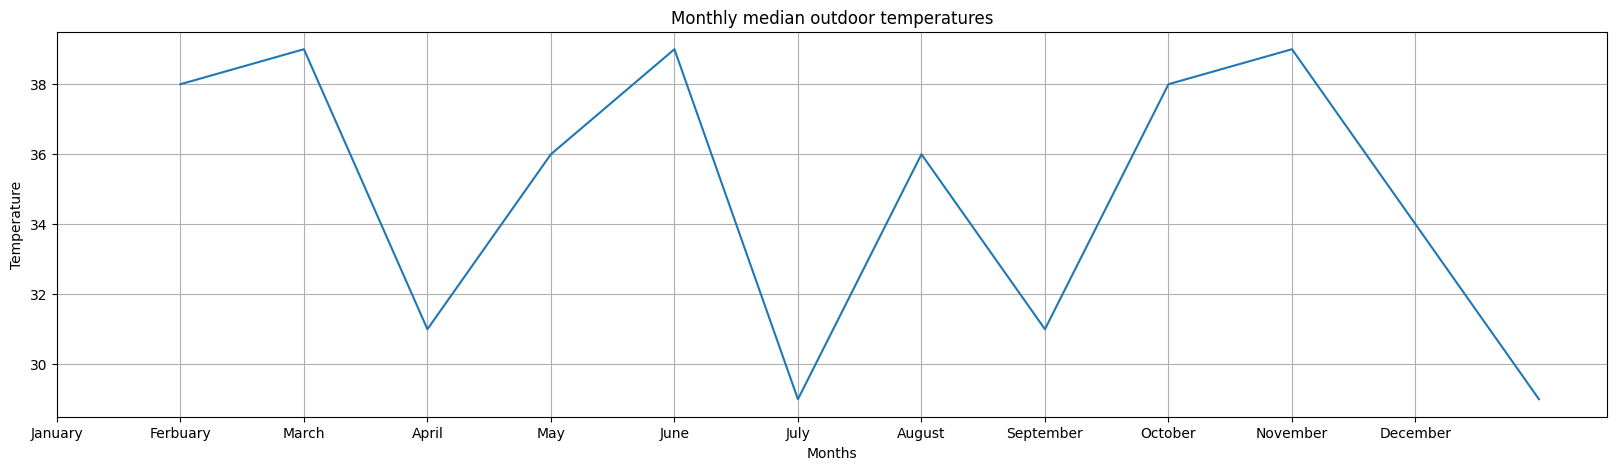

In [ ]:
# Create a line plot for the monthly median outdoor temperatures.
plt.figure(figsize=(20, 5))
plt.plot(group_monthly_out["Month"].median(), group_monthly_out["temp"].median())
plt.xticks(ticks= np.arange(0,12), labels=months_list)
plt.title("Monthly median outdoor temperatures")
plt.ylabel("Temperature")
plt.xlabel("Months")
plt.grid()
plt.show()

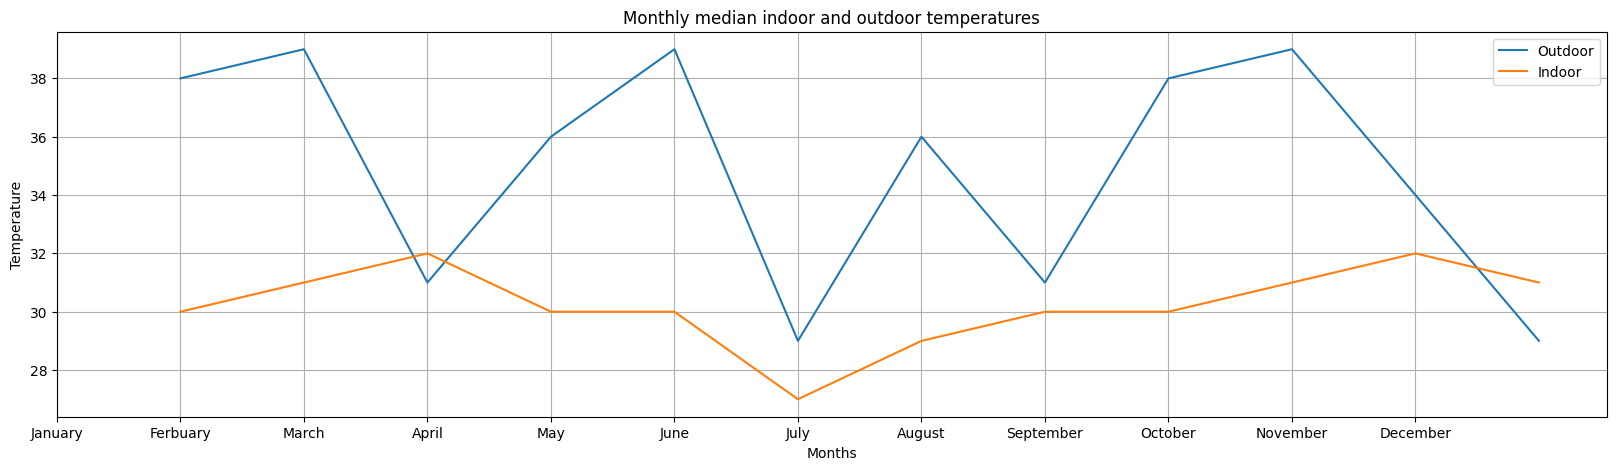

In [ ]:
# Compare the monthly median indoor and outdoor temperatures.
plt.figure(figsize=(20,5))
plt.plot(group_monthly_out["Month"].median(), group_monthly_out["temp"].median(),label="Outdoor")
plt.plot(group_monthly_in["Month"].median(), group_monthly_in["temp"].median(),label="Indoor")
plt.xticks(ticks= np.arange(0,12), labels=months_list)
plt.title("Monthly median indoor and outdoor temperatures")
plt.ylabel("Temperature")
plt.xlabel("Months")
plt.legend()
plt.grid()
plt.show()

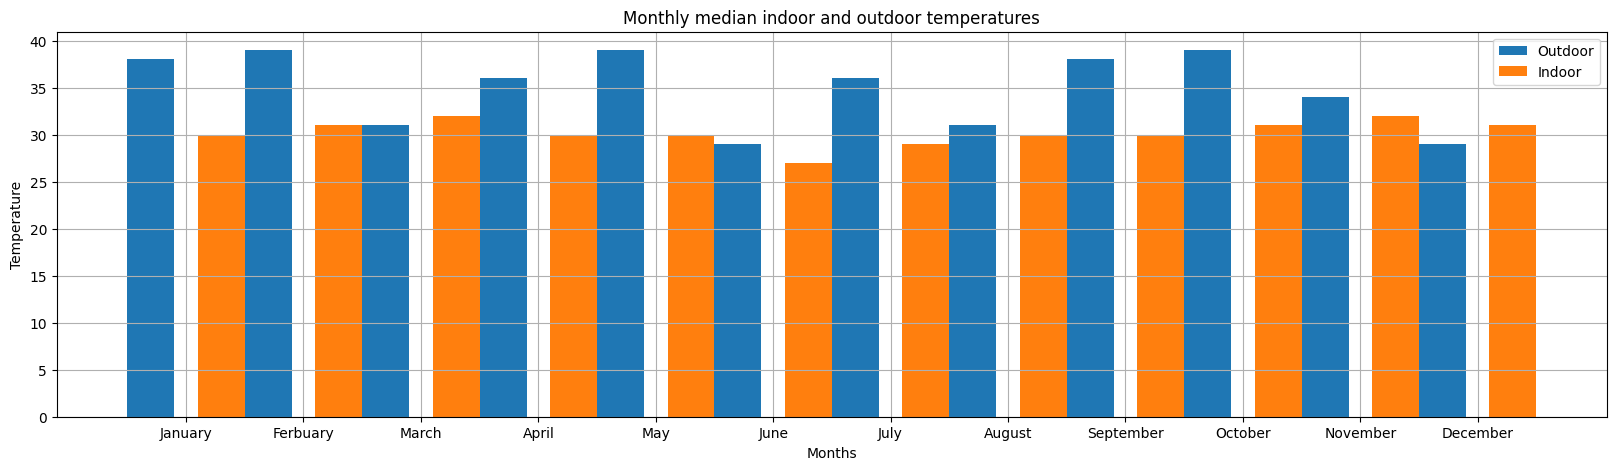

In [ ]:
# Create a bar plot for the monthly median indoor & outdoor temperatures in a single bar chart.
w=0.3
plt.figure(figsize=(20, 5))
plt.bar(x=np.arange(0,12) - w, height=group_monthly_out["temp"].median(), width=0.4, label="Outdoor")
plt.bar(x=np.arange(0,12) + w, height=group_monthly_in["temp"].median(), width=0.4, label="Indoor")
plt.xticks(ticks= np.arange(0,12), labels=months_list)
plt.title("Monthly median indoor and outdoor temperatures")
plt.ylabel("Temperature")
plt.xlabel("Months")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Get the maximum and minimum temperatures for each day in each month.
df_day = df.groupby(by=['Month', 'Day'])
print(df_day.agg(func={'temp':['max', 'min']}))

          temp    
           max min
Month Day         
1     11    48  29
      12    43  34
2     8     35  31
      11    48  30
      12    42  32
...        ...  ..
11    28    43  25
      29    43  33
      30    44  34
12    9     35  26
      10    49  30

[86 rows x 2 columns]


In [ ]:
# Get the hottest day for each month along with the temperature.
group_monthly.max().loc[:, ['temp', 'Day']]

,temp,Day
Month,,
1,48,12
2,48,12
3,49,12
4,49,12
5,48,12
6,42,12
7,41,31
8,42,30
9,51,30


9. Heat Index

In [ ]:
# Get the coldest day for each month along with the temperature.
group_monthly.min().loc[:, ['temp', 'Day']]

,temp,Day
Month,,
1,29,11
2,30,8
3,21,9
4,23,9
5,24,9
6,24,9
7,25,9
8,29,12
9,24,9


In [ ]:
# Create a function to label the each temperature value on a given day and time with the heat indices as advised in the data-description.
def label(temp):
  heat_list = []
  for i in temp:
    if i <= 32:
      heat_list.append('Green')
    elif i >= 32 and i <= 41:
      heat_list.append('Yellow')
    elif i >= 42 and i <= 53:
      heat_list.append('Orange')
    elif i <= 54:
      heat_list.append('Red')
  return pd.Series(heat_list)

In [ ]:
# Add the 'heat_index' column in the DataFrame containing the heat indices corresponding to the temperature values on a given day and time.
df['heat_index'] = label(df['temp'])

In [ ]:
# Get the counts of the heat zones.
df['heat_index'].value_counts()

Yellow    43542
Green     41657
Orange    12407
Name: heat_index, dtype: int64

In [ ]:
# Get the percentage distribution of the heat zones.
green_per = df[df['heat_index'] == 'Green'].shape[0] * 100 / df.shape[0]
yellow_per = df[df['heat_index'] == 'Yellow'].shape[0] * 100 / df.shape[0]
orange_per = df[df['heat_index'] == 'Orange'].shape[0] * 100 / df.shape[0]
red_per = df[df['heat_index'] == 'Red'].shape[0] * 100 / df.shape[0]

print(f'the percentage of green zone is {round(green_per, 2)} %')
print(f'the percentage of yellow zone is {round(yellow_per, 2)} %')
print(f'the percentage of orange zone is {round(orange_per, 2)} %')
print(f'the percentage of red zone is {round(red_per, 2)} %')

the percentage of green zone is 42.68 %
the percentage of yellow zone is 44.61 %
the percentage of orange zone is 12.71 %
the percentage of red zone is 0.0 %
